Successfully loaded


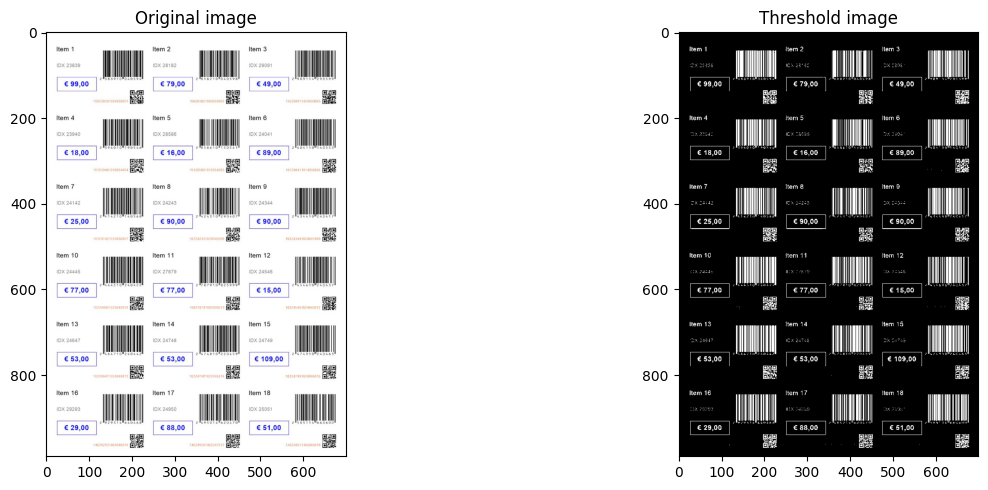

In [13]:
## Section 1 : Load and Preprocess the Image
## Load the image, convert it to grayscale, and apply thresholding. This prepares the image for contour detection.
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import os


#load image 
image_path = "inputimage/PriceTag.jpg"
image = cv2.imread(image_path)
##do a error check here
if image is None:
    FileNotFoundError("Error: File not found")
print("Successfully loaded")
##Gray scalling the image
greyscaleimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_,thresh = cv2.threshold(greyscaleimg,0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

##Plot both original and threshold image 
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("Threshold image")
plt.imshow(thresh, cmap='gray')

plt.tight_layout()
plt.show()

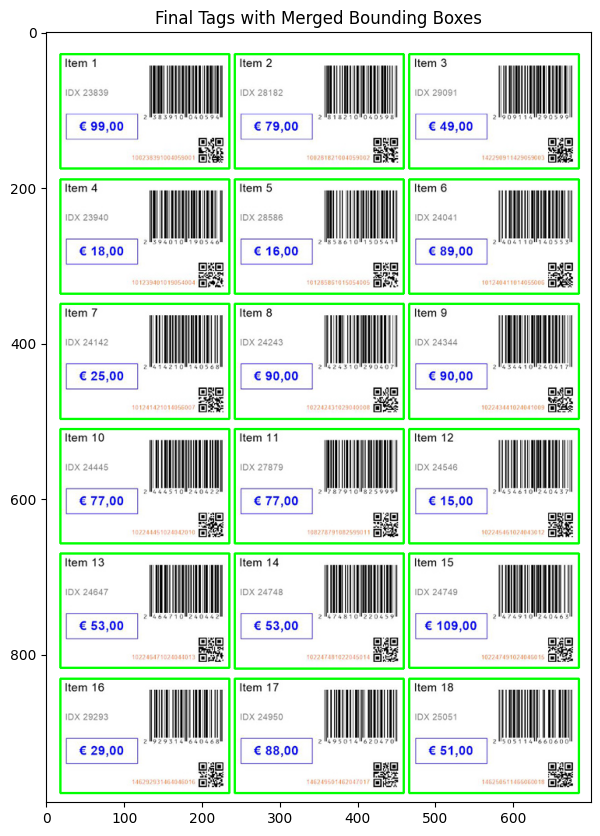

Total tags detected: 18


True

In [14]:
# Step 1: Creates a rectangular-shaped kernel (structuring element) of size 15x15 pixels.
#         cv2.MORPH_RECT: Specifies the shape of the kernel as a rectangle.
#         (15, 15): Defines the dimensions of the kernel.
# Use case:
#         Kernels are used in morphological operations to determine how the neighboring pixels are combined.
#         A 15x15 kernel is relatively large, so it focuses on merging larger gaps or small imperfections in the binary image.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))  # Keeps rows intact

# Purpose: Applies a morphological closing operation on the thresh image.
#          cv2.MORPH_CLOSE: A combination of dilation followed by erosion.
#          Dilation: Expands white regions (foreground) in the image.
#          Erosion: Shrinks back the expanded white regions, removing small holes or gaps.
# Effect on Image:
#     Fills small gaps or holes in the white regions.
#     Ensures that disconnected parts of a row or region are merged into a single connected area, preserving the integrity of rows or tags.
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Step 2: Find row-level contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
filtered_contours = [ctr for ctr in contours if cv2.contourArea(ctr) > 3000]  


# Step 3: Process each row to adjust bounding boxes manually
#      bottom_adjust - Fixed pixel addition to bottom boundary
#      top_adjust  - Pixels to add to top margin
#      side_adjust  - pixels to add to left and right margins
image_result = image.copy()
all_tags = []  

bottom_adjust = 37  
top_adjust = 15   
side_adjust = 8   

for row_idx, row_contour in enumerate(filtered_contours):
    # Get the bounding box for each detected tag directly
    x_row, y_row, w_row, h_row = cv2.boundingRect(row_contour)

    # Adjust bounding box margins if needed
    tag_x = max(0, x_row - side_adjust)  # Add left margin
    tag_y = max(0, y_row - top_adjust)  # Add top margin
    tag_w = w_row + (2 * side_adjust)   # Add both side margins
    tag_h = h_row + bottom_adjust + top_adjust  # Add top/bottom margins

    # # Ensure bounding box stays within image boundaries
    if tag_x + tag_w > image.shape[1]:
        tag_w = image.shape[1] - tag_x
    
    # Store or draw the final bounding box
    cv2.rectangle(image_result,
                  (tag_x, tag_y),
                  (tag_x + tag_w, tag_y + tag_h),
                  (0, 255, 0), 2)

    all_tags.append((tag_x, tag_y, tag_w, tag_h))
    

# Step 4: Display the refined bounding boxes
plt.figure(figsize=(10, 10))
plt.title("Final Tags with Merged Bounding Boxes")
plt.imshow(cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB))
plt.show()
print(f"Total tags detected: {len(all_tags)}")

intermidiate_folder = "intermidiate_images/"
os.makedirs(intermidiate_folder, exist_ok=True)
output_path = f"{intermidiate_folder}/orig_image_with_bounding_box.jpg"
cv2.imwrite(output_path, image_result)

In [15]:
# Step 5: Crop and save individual tags
output_folder = "Output_Cropped_Tags/"
os.makedirs(output_folder, exist_ok=True)

for idx, (x, y, w, h) in enumerate(all_tags):
    tag_crop = image[y:y + h, x:x + w]
    output_path = f"{output_folder}/tag_{idx + 1}.jpg"
    cv2.imwrite(output_path, tag_crop)
    print(f"Saved: {output_path}")
    #plt.imshow(cv2.cvtColor(tag_crop, cv2.COLOR_BGR2RGB))
    #plt.title(f"Extracted Image {idx + 1}")
    #plt.show()
    
# Step 6: Display a confirmation message
print(f"All {len(all_tags)} tags have been cropped and saved successfully in '{output_folder}' folder.")


Saved: Output_Cropped_Tags//tag_1.jpg
Saved: Output_Cropped_Tags//tag_2.jpg
Saved: Output_Cropped_Tags//tag_3.jpg
Saved: Output_Cropped_Tags//tag_4.jpg
Saved: Output_Cropped_Tags//tag_5.jpg
Saved: Output_Cropped_Tags//tag_6.jpg
Saved: Output_Cropped_Tags//tag_7.jpg
Saved: Output_Cropped_Tags//tag_8.jpg
Saved: Output_Cropped_Tags//tag_9.jpg
Saved: Output_Cropped_Tags//tag_10.jpg
Saved: Output_Cropped_Tags//tag_11.jpg
Saved: Output_Cropped_Tags//tag_12.jpg
Saved: Output_Cropped_Tags//tag_13.jpg
Saved: Output_Cropped_Tags//tag_14.jpg
Saved: Output_Cropped_Tags//tag_15.jpg
Saved: Output_Cropped_Tags//tag_16.jpg
Saved: Output_Cropped_Tags//tag_17.jpg
Saved: Output_Cropped_Tags//tag_18.jpg
All 18 tags have been cropped and saved successfully in 'Output_Cropped_Tags/' folder.
